In [ ]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('driver-data.csv')
df.head()


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


Text(0, 0.5, 'mean_over_speed_perc')

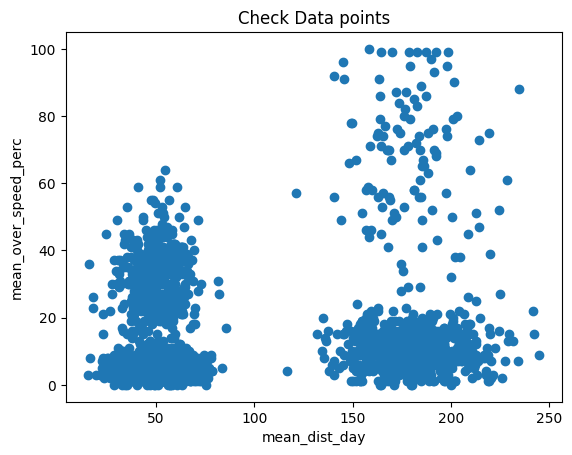

In [9]:
## visualize the data points using scatter plot

import matplotlib.pyplot as plt
plt.title('Check Data points')
plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

In [11]:
# Use K_mean cluster

from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3)
y_predicted = KM.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
df['cluster']=y_predicted
df.sample(10)

,id,mean_dist_day,mean_over_speed_perc,cluster
3127,3423310496,66.89,3,0
2910,3423311926,51.91,6,0
1360,3423314066,41.20,3,0
3871,3423313759,183.96,6,1
3861,3423312862,134.54,10,1
2030,3423310529,59.31,7,0
2924,3423314013,35.83,6,0
481,3423310599,45.10,4,0
1880,3423313265,49.43,5,0
76,3423310803,61.92,40,0


In [17]:
df.cluster.unique()

array([0, 2, 1])

In [16]:
# center of KM

KM.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

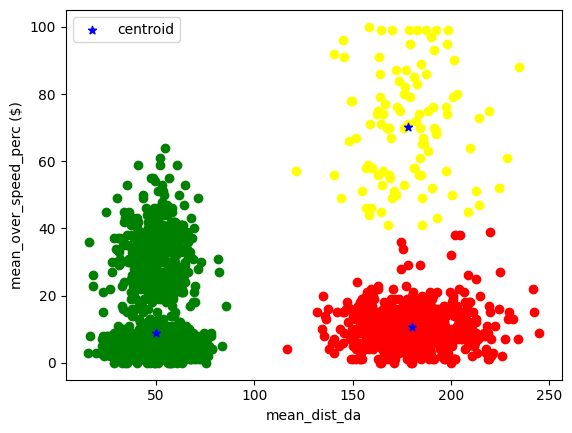

In [20]:
## Plot the group of clusters with there centers

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.scatter(df1['mean_dist_day'], df1['mean_over_speed_perc'],color = 'green')
plt.scatter(df2['mean_dist_day'], df2['mean_over_speed_perc'], color = 'red')
plt.scatter(df3['mean_dist_day'], df3['mean_over_speed_perc'], color = 'yellow')

plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1],color = 'blue', marker = '*', label = 'centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

In [40]:
# decide the optimal number of clusters using the elbow method
# Take k = 1 to 10 and append them in a list

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

In [44]:
sse

[12184626.129627978,
 1316420.850947719,
 1043390.7593597216,
 910962.9271282046,
 557137.2236446806,
 372896.74263028696,
 320121.7401108448,
 306718.1473893423,
 254602.64167441815]

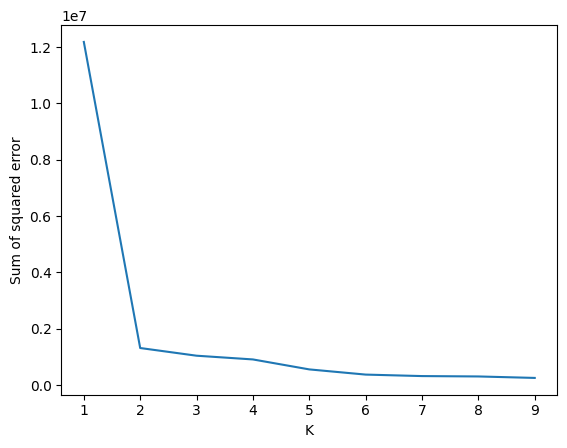

In [45]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)